Zakodowano zmienne kategoryczne (8 kolumn).
Zakodowano zmienną docelową 'income'.


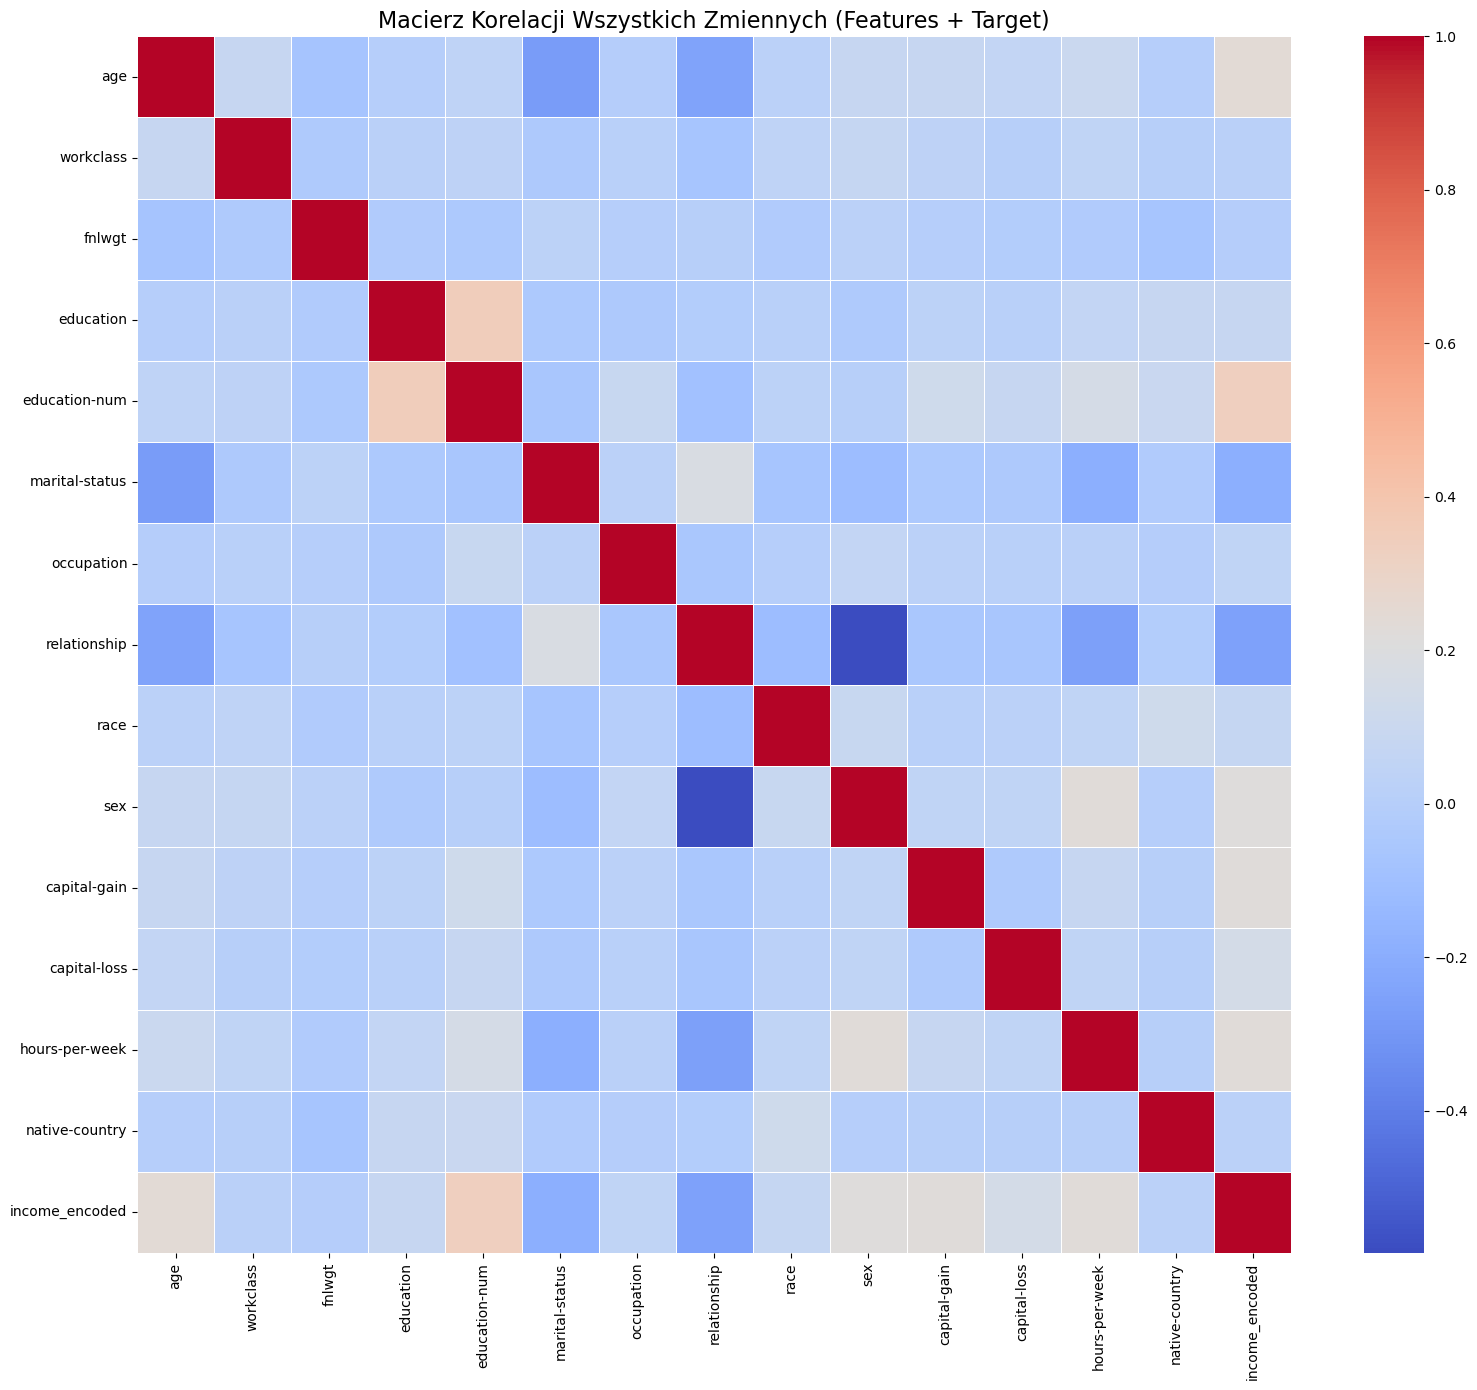

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import PartialDependenceDisplay, permutation_importance
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

RANDOM_STATE = 42

columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

df = pd.read_csv('../data/raw/adult/adult.data', header=None, names=columns, index_col=False, na_values=[' ?','?'])
df_processed = df.dropna().copy()  
X_corr = df_processed.drop('income', axis=1).copy()
y_raw = df_processed['income']

categorical_cols = X_corr.select_dtypes(include='object').columns.tolist()
numerical_cols = X_corr.select_dtypes(include=['int64', 'float64']).columns.tolist()

for col in categorical_cols:
    le = LabelEncoder()
    X_corr[col] = le.fit_transform(X_corr[col])
print(f"Zakodowano zmienne kategoryczne ({len(categorical_cols)} kolumn).")

target_le = LabelEncoder()
y_encoded_for_corr = target_le.fit_transform(y_raw)
print(f"Zakodowano zmienną docelową 'income'.")

X_corr['income_encoded'] = y_encoded_for_corr

correlation_matrix = X_corr.corr()

plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Macierz Korelacji Wszystkich Zmiennych (Features + Target)', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()